<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module_4_Lab2_correctfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron and Gradient Descent

## Introduction to Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [2]:
def eval_2nd_degree(coeffs, x):

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

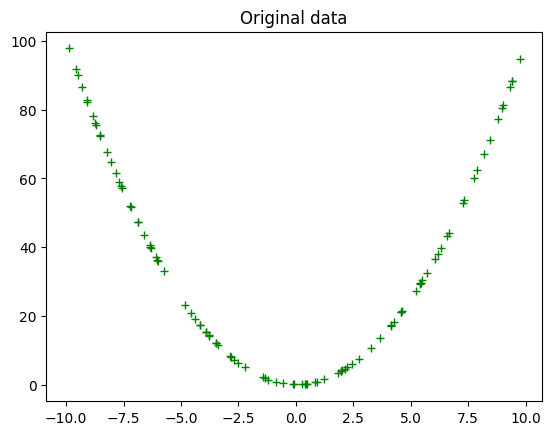

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
        jit_val = random.random() * interval_max

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


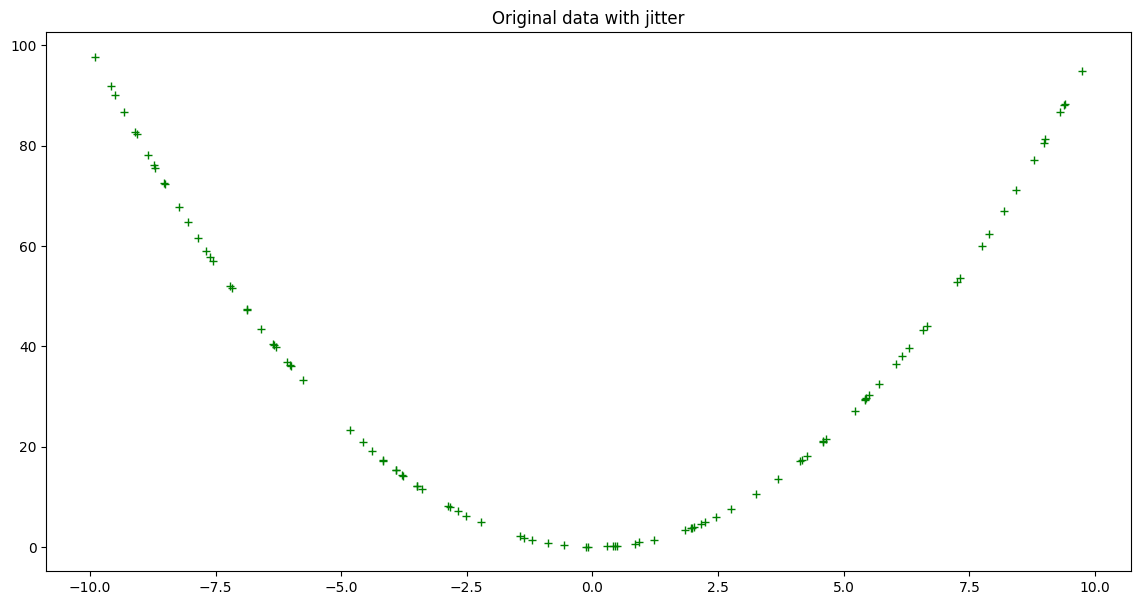

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [6]:
def loss_mse(ys, y_bar):

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

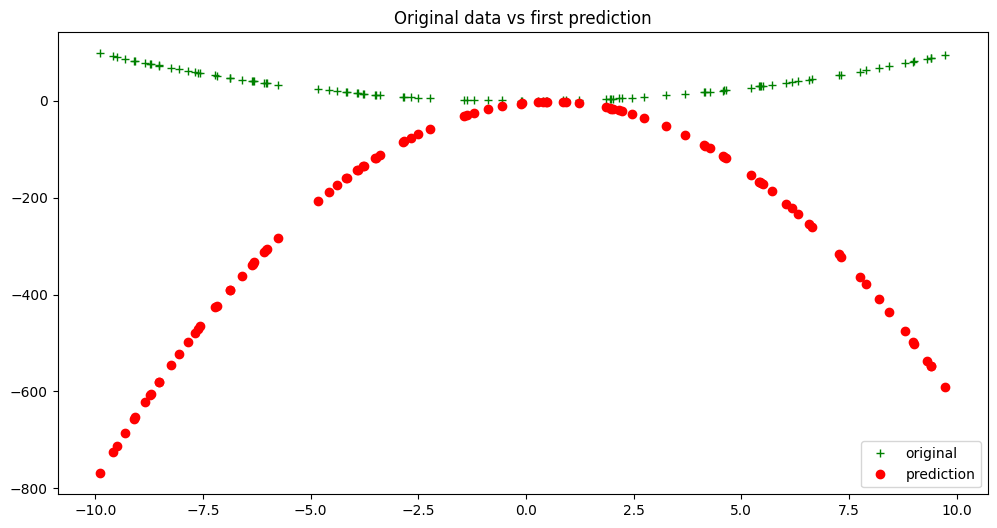

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [9]:
initial_loss = loss_mse(ys, y_bar)
initial_loss

146807.86204726336

In [15]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)

In [16]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


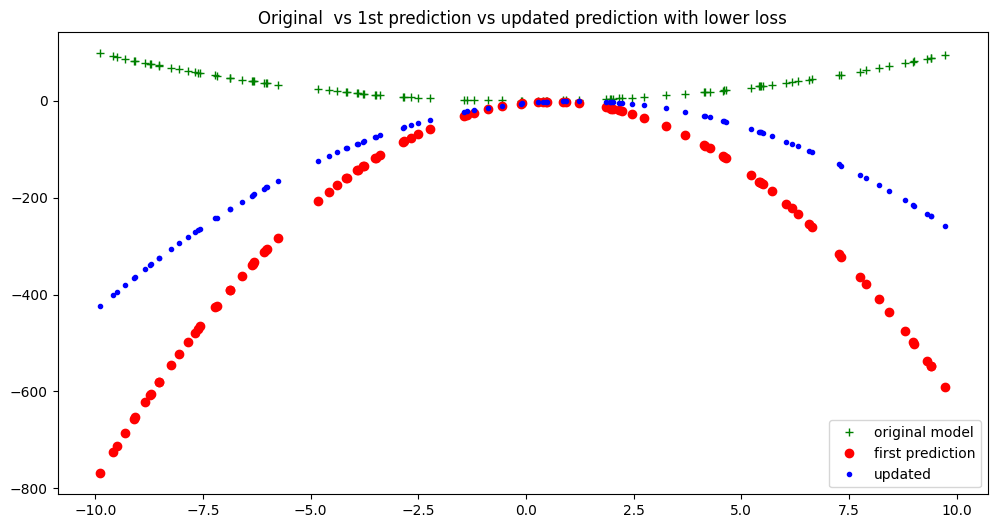

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated')
plt.title('Original  vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [18]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [19]:
def gradient_descent(epochs, lr):

    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses

In [23]:
GD = gradient_descent(30000, 0.0003)

[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

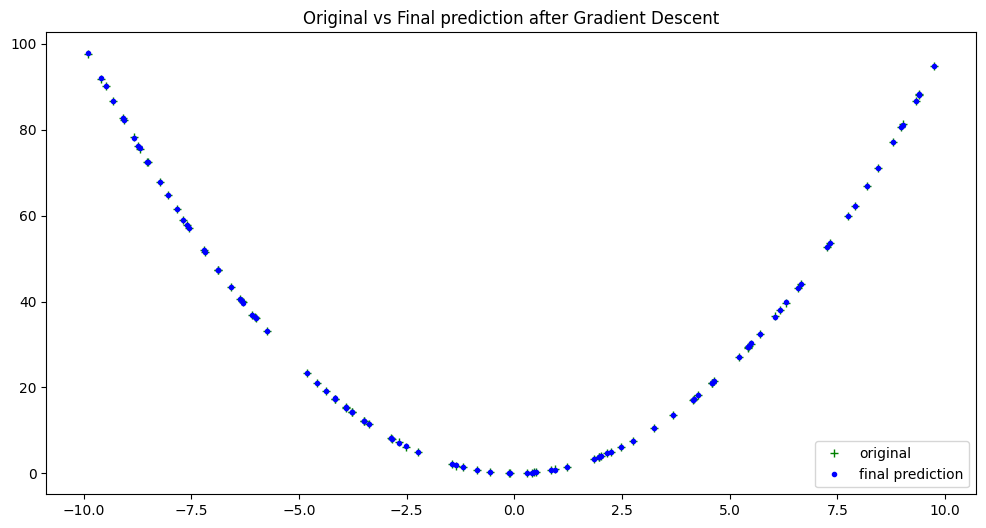

In [24]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [25]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


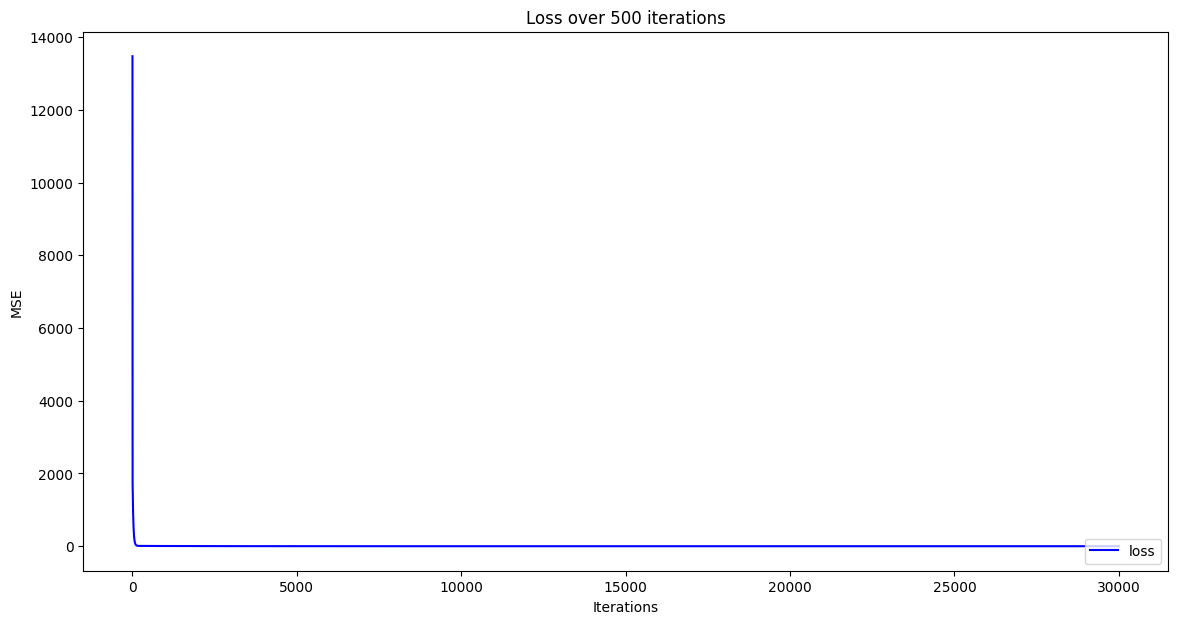

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

## Things to try

## 1.Change the coefficients array and try a different polynomial instead of our  x2 .

In [31]:
def eval_3rd_degree(coeff, x):

    a = coeff[0] * (x * x * x)
    b = coeff[1] * (x * x)
    c = coeff[2] * x
    d = coeff[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [3, -2, 3, 1]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

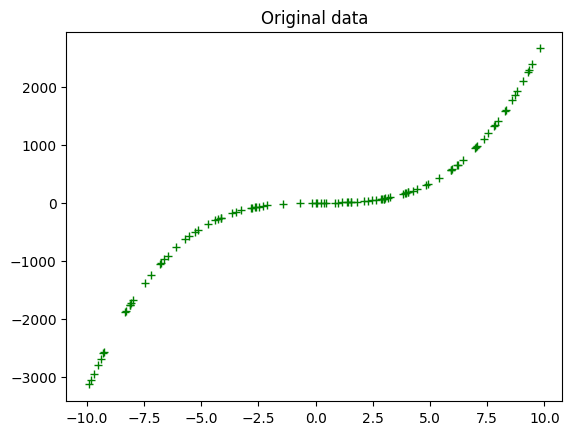

In [32]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

## 2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
A learning rate that is too large might lead to overshooting, making the algorithm fail to converge. On the other hand, a learning rate that is too small might result in slow convergence.

In [44]:
def eval_2nd_degree(coeffs, x):

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

In [45]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses

<ipython-input-6-626d24f1afd4>:3: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-626d24f1afd4>:3: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-33-75171a78fda2>:21: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-33-75171a78fda2>:22: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-33-75171a78fda2>:26: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


[201984.30106832576, 277919.762599604, 382802.9684591685, 527641.8098086641, 727631.9843002548, 1003750.0649696025, 1384952.5915365643, 1911211.7216797106, 2637705.6789075662, 3640603.294401045, 5025049.053807497, 6936185.745443771, 9574370.247160506, 13216177.568329329, 18243395.06343753, 25183046.367266174, 34762640.88020126, 47986440.772015944, 66240740.8015494, 91439197.74965791, 126223444.78312105, 174240021.7512561, 240522652.8436519, 332019946.915257, 458323840.8766638, 632675151.0412245, 873351647.3735782, 1205584166.599964, 1664201636.028226, 2297282293.8075047, 3171193873.92904, 4377551133.582811, 6042820101.198124, 8341575887.113435, 11514803912.679567, 15895163130.185705, 21941859652.244064, 30288786697.13363, 41810977504.04375, 57716337675.36805, 79672273520.879, 109980491230.48662, 151818291593.80978, 209571655911.1316, 289295041484.46686, 399346088420.38257, 551261775950.2943, 760967878346.4698, 1050448511301.9181, 1450050792296.8206, 2001666219366.2102, 2763122281686.47

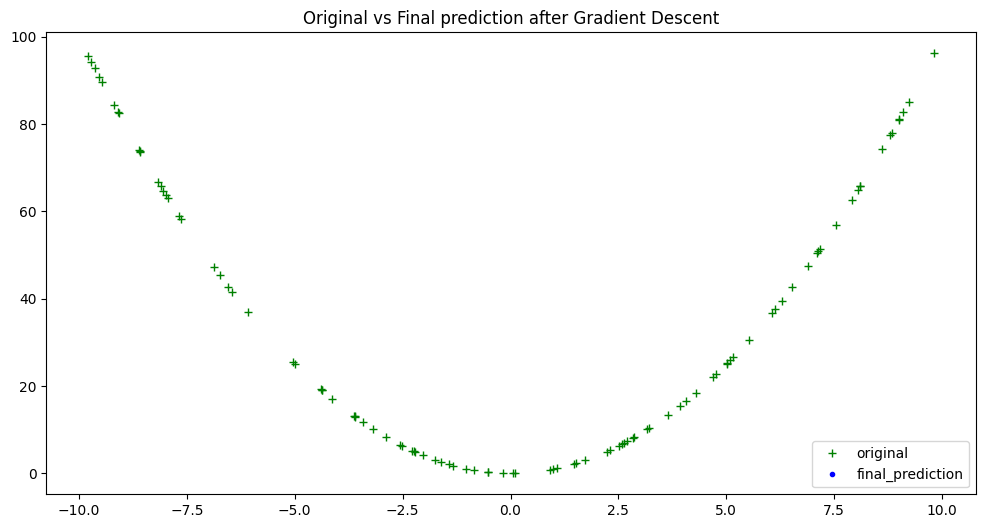

In [48]:
GD = gradient_descent(30000, 0.0005)
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

[48375.897383345036, 16863.662875296894, 6784.033491002929, 3546.93719517, 2494.5543976958857, 2139.893165435748, 2008.2343024208114, 1948.0222506928392, 1910.8700615916955, 1881.3269564619634, 1854.4569307819065, 1828.6808221717154, 1803.4911716564418, 1778.722702604143, 1754.3194237262264, 1730.2602771189645, 1706.5354011158377, 1683.138551702544, 1660.0646824899359, 1637.309171541961, 1614.8675739629246, 1592.7355423390604, 1570.9088007747873, 1549.3831360466054, 1528.154394229419, 1507.2184790774959, 1486.5713509730394, 1466.2090260633738, 1446.1275754655956, 1426.32312449994, 1406.7918519393843, 1387.5299892714233, 1368.5338199705918, 1349.7996787812153, 1331.3239510101102, 1313.1030718290658, 1295.1335255869428, 1277.4118451312793, 1259.9346111392413, 1242.6984514578126, 1225.7000404530838, 1208.9360983685149, 1192.4033906920545, 1176.0987275319922, 1160.0189630014129, 1144.1609946111487, 1128.5217626711053, 1113.0982496998442, 1097.8874798423103, 1082.8865182955947, 1068.0924707

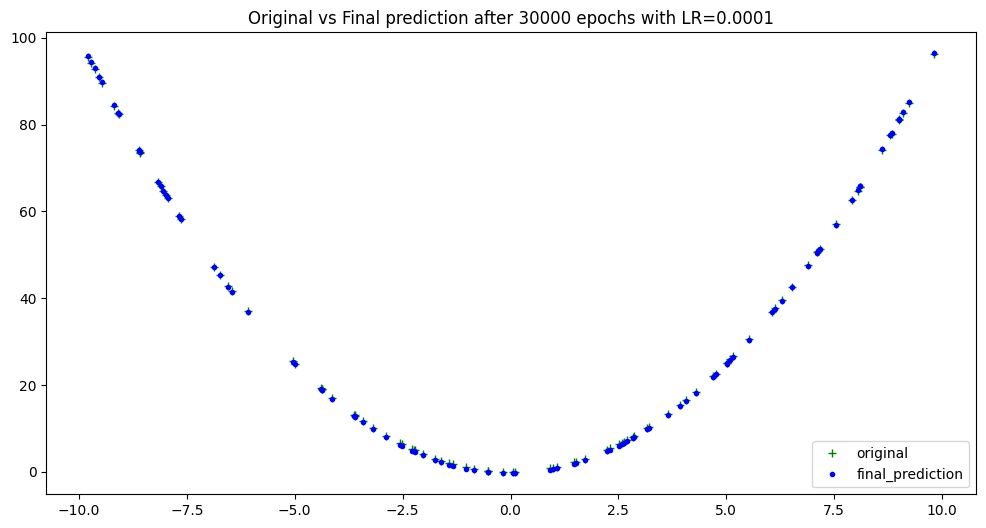

<ipython-input-6-626d24f1afd4>:3: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-626d24f1afd4>:3: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-33-75171a78fda2>:21: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-33-75171a78fda2>:22: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-33-75171a78fda2>:26: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


[201984.30106832576, 277919.762599604, 382802.9684591685, 527641.8098086641, 727631.9843002548, 1003750.0649696025, 1384952.5915365643, 1911211.7216797106, 2637705.6789075662, 3640603.294401045, 5025049.053807497, 6936185.745443771, 9574370.247160506, 13216177.568329329, 18243395.06343753, 25183046.367266174, 34762640.88020126, 47986440.772015944, 66240740.8015494, 91439197.74965791, 126223444.78312105, 174240021.7512561, 240522652.8436519, 332019946.915257, 458323840.8766638, 632675151.0412245, 873351647.3735782, 1205584166.599964, 1664201636.028226, 2297282293.8075047, 3171193873.92904, 4377551133.582811, 6042820101.198124, 8341575887.113435, 11514803912.679567, 15895163130.185705, 21941859652.244064, 30288786697.13363, 41810977504.04375, 57716337675.36805, 79672273520.879, 109980491230.48662, 151818291593.80978, 209571655911.1316, 289295041484.46686, 399346088420.38257, 551261775950.2943, 760967878346.4698, 1050448511301.9181, 1450050792296.8206, 2001666219366.2102, 2763122281686.47

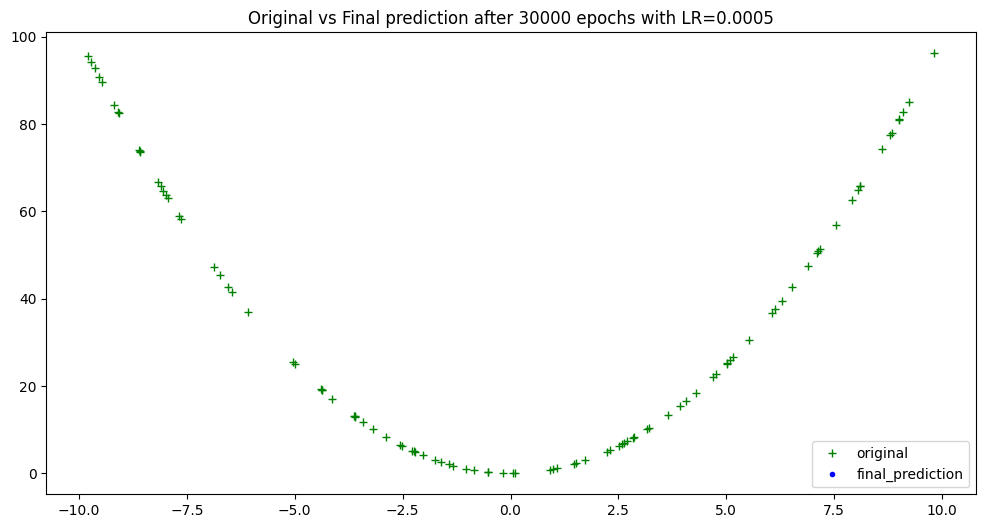

[1627432.6538388752, 18242502.677116774, 204687436.19465646, 2296840534.120932, 25773478894.33482, 289211421065.9434, 3245322424000.8887, 36416672707413.01, 408641693518164.5, 4585483001858736.0, 5.145499026135735e+16, 5.773908706505768e+17, 6.479064825729885e+18, 7.27034027550713e+19, 8.15825264037338e+20, 9.154603996787021e+21, 1.0272637785602245e+23, 1.1527214843069119e+24, 1.2935010930153499e+25, 1.4514738385724643e+26, 1.6287394849810796e+27, 1.827654236293692e+28, 2.0508620551316014e+29, 2.301329806073199e+30, 2.5823866910351767e+31, 2.8977685008193488e+32, 3.251667271013837e+33, 3.648787002271905e+34, 4.094406185598851e+35, 4.594447963729306e+36, 5.155558861175611e+37, 5.785197129422181e+38, 6.491731881544819e+39, 7.284554333946194e+40, 8.174202633825763e+41, 9.17250193158317e+42, 1.0292721559988968e+44, 1.1549751409338372e+45, 1.296029984295588e+46, 1.4543115783731342e+47, 1.631923792364809e+48, 1.831227436878075e+49, 2.054871643678692e+50, 2.30582907778697e+51, 2.5874354499580

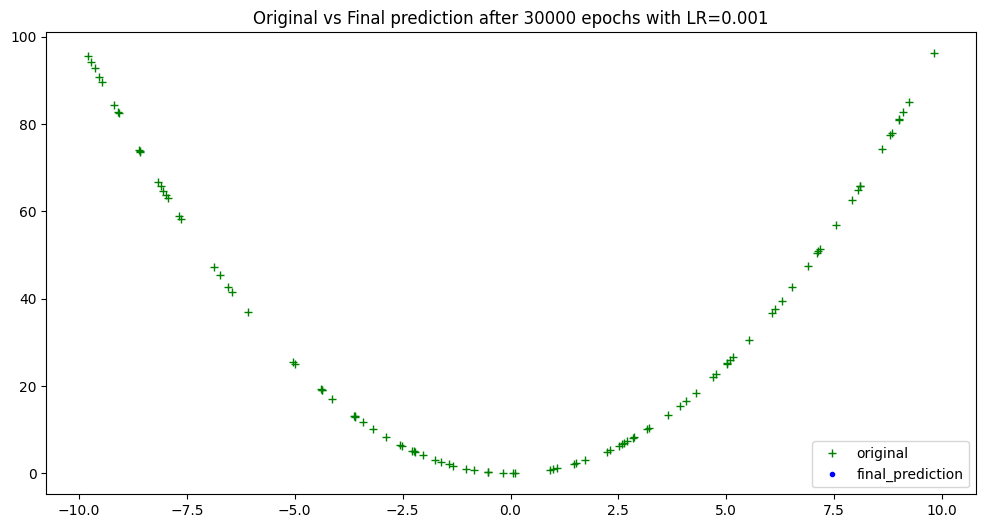

[246309547818.8089, 4.187921886205318e+17, 7.120612899280165e+23, 1.2106989929316696e+30, 2.0585195013679247e+36, 3.5000463056891386e+42, 5.951036234452782e+48, 1.0118389635647108e+55, 1.7204030489017042e+61, 2.9251558372914865e+67, 4.973565164222942e+73, 8.456421407509108e+79, 1.437822983315653e+86, 2.444692419792345e+92, 4.156645913120794e+98, 7.067435194375661e+104, 1.2016573283048417e+111, 2.0431461979557507e+117, 3.473907484182583e+123, 5.906593087041119e+129, 1.004282412664512e+136, 1.7075548451103797e+142, 2.903310375937012e+148, 4.936421903613068e+154, 8.393267703115045e+160, 1.427085125859935e+167, 2.4264351245401417e+173, 4.1256035165066826e+179, 7.014654627800133e+185, 1.192683188058316e+192, 2.0278877044628718e+198, 3.447963870947616e+204, 5.862481847094668e+210, 9.967822951134578e+216, 1.6948025934511846e+223, 2.881628059456976e+229, 4.899556033921629e+235, 8.330585639168694e+241, 1.4164274601830942e+248, 2.4083141772502497e+254, 4.094792948729488e+260, 6.962268233669257e+

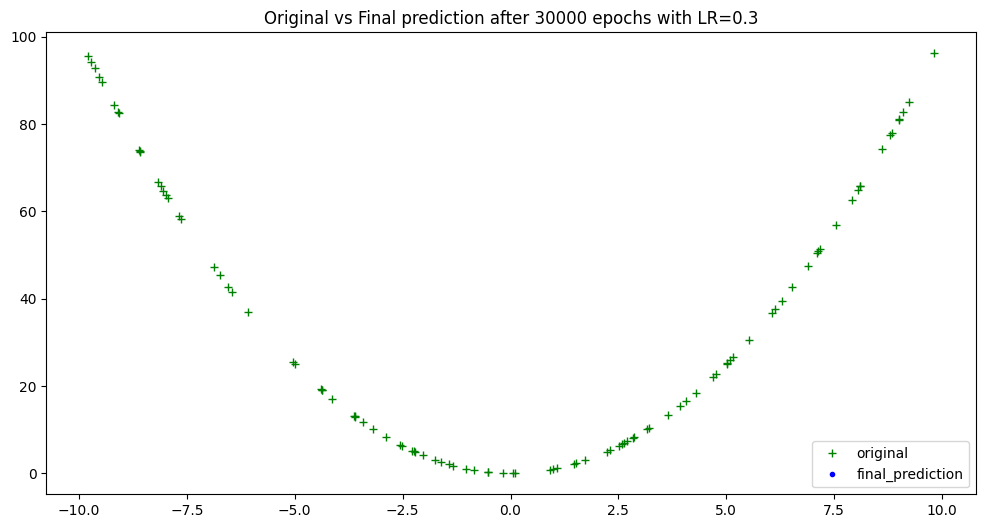

<ipython-input-33-75171a78fda2>:11: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_squared * (y - y_bar)
<ipython-input-33-75171a78fda2>:22: RuntimeWarning: overflow encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-44-bf85a8c7c38a>:6: RuntimeWarning: invalid value encountered in add
  y = a + b + c


[684613114608.4563, 3.235388133643094e+18, 1.5290056854022484e+25, 7.225897763736381e+31, 3.414872749687958e+38, 1.613827966828516e+45, 7.626757707899508e+51, 3.6043143588169935e+58, 1.7033558026523748e+65, 8.049855538632368e+71, 3.804265326829946e+78, 1.7978502356303602e+85, 8.496424912742752e+91, 4.015308665160576e+98, 1.8975867899842358e+105, 8.967767924707416e+111, 4.238059728065418e+118, 2.0028562747664904e+125, 9.465258903282696e+131, 4.473168006856491e+138, 2.1139656317932247e+145, 9.990348418733791e+151, 4.721319023669881e+158, 2.2312388306165116e+165, 1.0544567512366944e+172, 4.983236330292e+178, 2.355017813145745e+185, 1.112953216069683e+192, 5.259683617871604e+198, 2.485663490672271e+205, 1.1746947987265578e+212, 5.5514669436691044e+218, 2.6235567962044566e+225, 1.2398615235852218e+232, 5.859437081335706e+238, 2.769099795181442e+245, 1.3086434019572984e+252, 6.184492001575409e+258, 2.922716857804341e+265, 1.381240986117803e+272, 6.527579490422877e+278, 3.084855896402956e+285

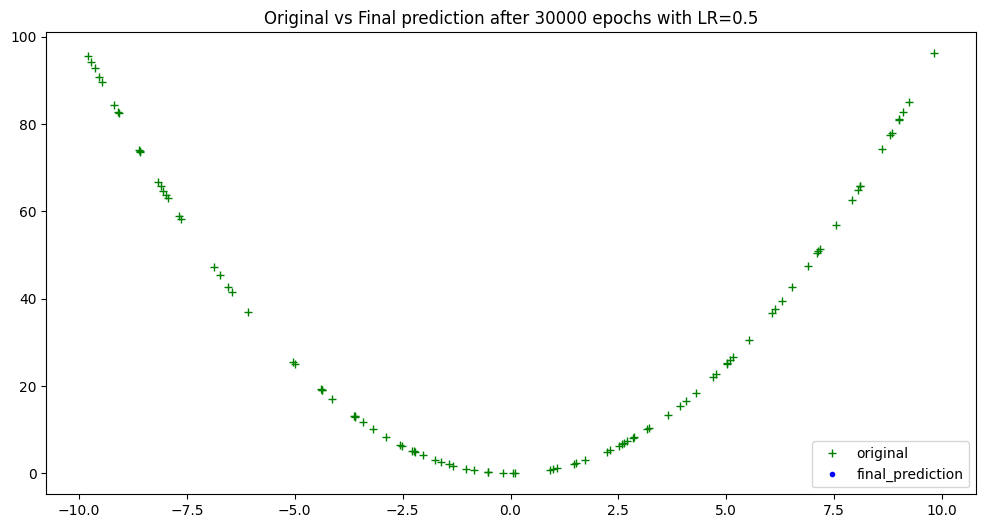

<ipython-input-33-75171a78fda2>:13: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x * (y - y_bar)
<ipython-input-33-75171a78fda2>:23: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)


[2739712580154.8257, 5.181385157648046e+19, 9.799148357354602e+26, 1.8532362620031281e+34, 3.5048807483625626e+41, 6.628506743638167e+48, 1.2535976201468068e+56, 2.3708310996983147e+63, 4.4837673691806057e+70, 8.479798423214136e+77, 1.603717931322687e+85, 3.0329862514244525e+92, 5.736049601779245e+99, 1.0848141833356217e+107, 2.0516241909782234e+114, 3.8800763169085664e+121, 7.338084767784143e+128, 1.387794560239174e+136, 2.6246272731611163e+143, 4.9637522154820676e+150, 9.387556209849154e+157, 1.7753950593708077e+165, 3.357665771983613e+172, 6.350090576654941e+179, 1.2009429487646668e+187, 2.2712494393226744e+194, 4.295436366007109e+201, 8.123622731600404e+208, 1.5363572094240995e+216, 2.905592188282723e+223, 5.49511917724799e+230, 1.0392488971415311e+238, 1.9654501301476424e+245, 3.717102057767495e+252, 7.029864302291624e+259, 1.3295032350635911e+267, 2.514385450467875e+274, 4.755260481349746e+281, 8.993252105113356e+288, 1.7008234090084784e+296, 3.216634244008841e+303, inf, inf, inf

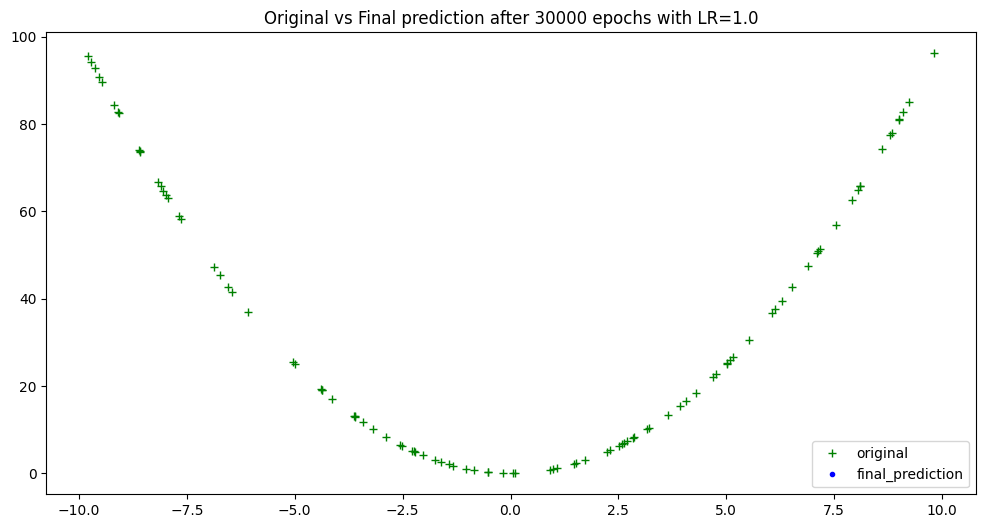

In [52]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_gradient_descent(epochs, lr):
    # Generate random coefficients for the initial guess
    rand_coeffs = np.random.uniform(-1, 1, 3)

    # Perform gradient descent
    GD = gradient_descent(epochs, lr)

    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='original')
    plt.plot(xs, GD[2], 'b.', label='final_prediction')
    plt.title(f'Original vs Final prediction after {epochs} epochs with LR={lr}')
    plt.legend(loc="lower right")
    plt.show()

learning_rates = [0.0001, 0.0005, 0.001, 0.3, 0.5, 1.0]

for lr in learning_rates:
    visualize_gradient_descent(30000, lr)


## Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?
The reason why initialization may not matter as much in the case of a simple quadratic function like x2 is related to the nature of the function. Quadratic functions are well-behaved, with a single global minimum (or maximum) point. Regardless of the initial value, the optimization algorithm tends to converge to the same minimum. Additionally, quadratic functions are convex, which means there are no local minima or maxima, simplifying the optimization process.


For higher-degree polynomials with multiple roots, the landscape of the objective function becomes more complex. There may be multiple local minima, maxima, and saddle points. The choice of initialization can influence which of these points the optimization algorithm converges to.

In [56]:
def eval_5th_degree(coeff, x):

    a = coeff[0] * (x * x * x * x * x)
    b = coeff[1] * (x * x * x * x)
    c = coeff[2] * (x * x * x)
    d = coeff[3] * (x * x)
    e = coeff[4] * (x)
    f = coeff[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1,0,0,0,0,0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

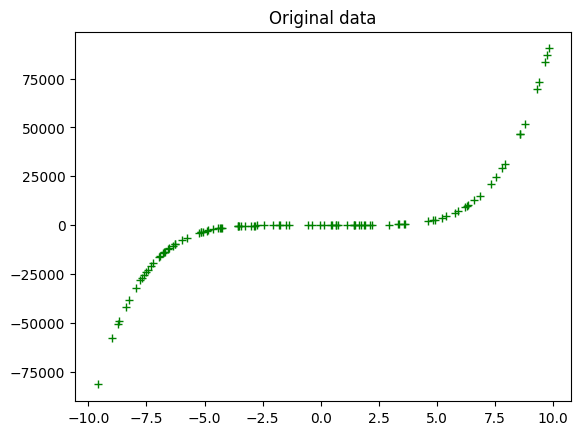

In [57]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

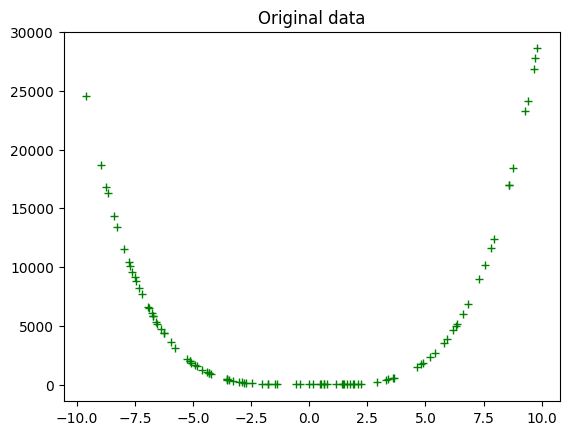

In [58]:
coeffs = [0,3,1,0,0,4]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

## Can you modify the algorithm to find a maxima of a function, instead of a minima?

yes,we can modify the algorithm to find a maxima of a function.

<ipython-input-60-311053116583>:45: RuntimeWarning: overflow encountered in square
  losses.append(np.sum((eval_2nd_degree(rand_coeffs_to_test, hundred_xs) - ys)**2))
<ipython-input-60-311053116583>:22: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (2 / n) * sum(a_s)
<ipython-input-60-311053116583>:23: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (2 / n) * sum(b_s)


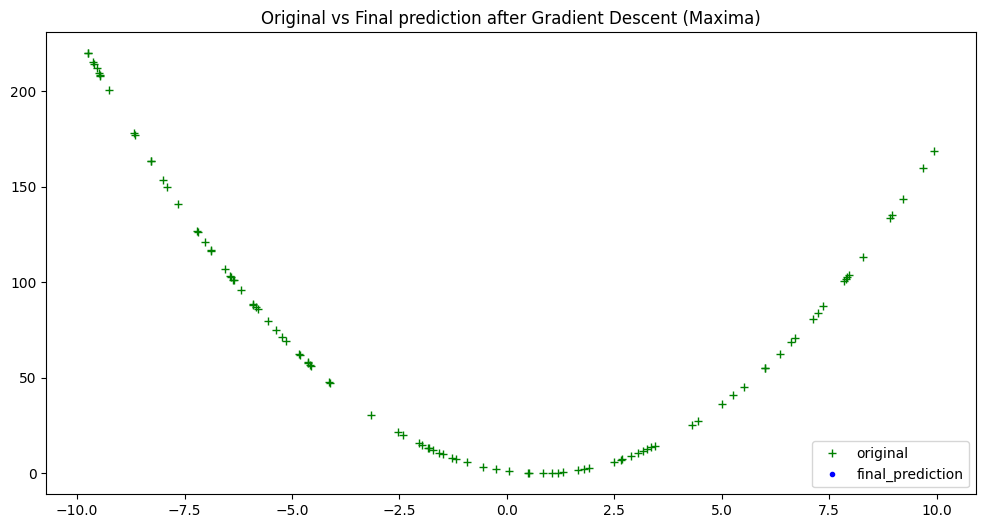

In [60]:
import numpy as np
import matplotlib.pyplot as plt
def calc_gradient_2nd_poly_for_maxima(rand_coeffs, hundred_xs, ys):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in zip(hundred_xs, ys, y_bars):
        x_squared = x ** 2
        partial_a = -x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = -x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = -(y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (2 / n) * sum(a_s)
    gradient_b = (2 / n) * sum(b_s)
    gradient_c = (2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)

def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x ** 2)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

def gradient_descent_maxima(epochs, lr):
    losses = []
    init_coeffs = np.random.uniform(-1, 1, 3)  # Initial random coefficients
    rand_coeffs_to_test = init_coeffs

    for _ in range(epochs):
        loss = calc_gradient_2nd_poly_for_maxima(rand_coeffs_to_test, hundred_xs, ys)

        rand_coeffs_to_test = [c + lr * g for c, g in zip(rand_coeffs_to_test, loss)]

        losses.append(np.sum((eval_2nd_degree(rand_coeffs_to_test, hundred_xs) - ys)**2))

    return losses, rand_coeffs_to_test
hundred_xs = np.random.uniform(-10, 10, 100)
true_coeffs = [2, -3, 1]
ys = [eval_2nd_degree(true_coeffs, x) for x in hundred_xs]

GD_maxima = gradient_descent_maxima(30000, 0.0003)

plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, ys, 'g+', label='original')
plt.plot(hundred_xs, [eval_2nd_degree(GD_maxima[1], x) for x in hundred_xs], 'b.', label='final_prediction')
plt.title('Original vs Final prediction after Gradient Descent (Maxima)')
plt.legend(loc="lower right")
plt.show()
